In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
IPython.display.set_matplotlib_formats('svg')
import seaborn as sns
sns.set()

In [2]:
np_species = pd.read_excel('datasets/npspecies/NPSpecies_FullListWithDetails_YELL_20190917170641.xlsx')

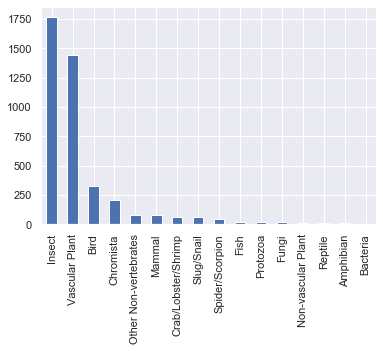

In [3]:
np_species['Category'].value_counts().plot(kind='bar')

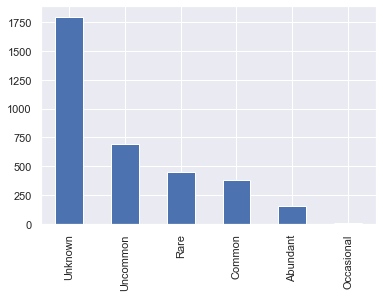

In [4]:
np_species['Abundance'].value_counts().plot(kind='bar')

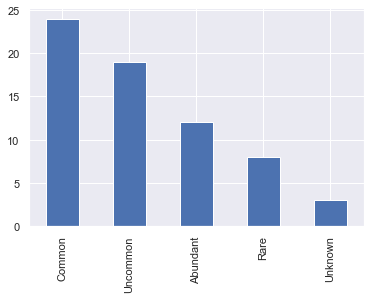

In [5]:
np_species[np_species['Category'] == 'Mammal']['Abundance'].value_counts().plot(kind='bar')

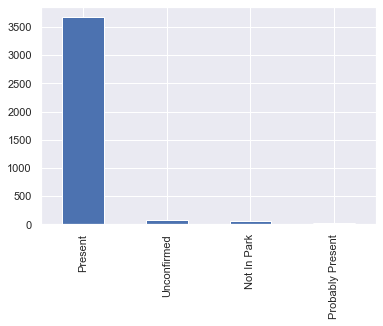

In [6]:
np_species['Occurrence'].value_counts().plot(kind='bar')

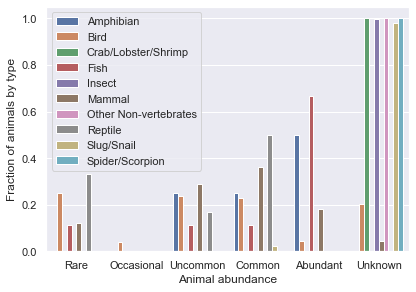

In [48]:
df_np = np_species.copy()
df_np_fauna = df_np[~df_np['Category'].str.contains('plant|bacteria|chromista|protozoa|fungi', case=False)]
df_np_fauna_ct = df_np_fauna.groupby(['Category','Abundance']).size().reset_index()
df_np_fauna_cattotal = df_np_fauna.dropna(axis=0, subset=['Abundance']).groupby(['Category']).size().reset_index().rename(columns={0: 'Abundance_CatTotal'}, inplace=False)
df_np_fauna_ct2 = df_np_fauna_ct.merge(df_np_fauna_cattotal, on='Category', how='left')
df_np_fauna_ct2.rename(columns={0: 'Abundance_Num'}, inplace=True)
df_np_fauna_ct2['Abundance_Frac'] = df_np_fauna_ct2['Abundance_Num']/df_np_fauna_ct2['Abundance_CatTotal']
# df_np_fauna_ct2 = df_np_fauna_ct[df_np_fauna_ct['Abundance_Num'] < 100] # drop outlier
df_np_fauna_ct2['Abundance'] = pd.Categorical(df_np_fauna_ct2['Abundance'], ['Rare','Occasional','Uncommon','Common','Abundant','Unknown'])
df_np_fauna_ct2.sort_values(by=['Abundance'])
df_np_fauna_ct2.rename(columns={'Category': 'Animal type'}, inplace=True)
plt.figure(figsize=(6.5,4.5))
ax = sns.barplot(x="Abundance", y="Abundance_Frac", hue="Animal type", data=df_np_fauna_ct2)
ax.set(xlabel='Animal abundance', ylabel='Fraction of animals by type')
plt.legend(loc='upper left')
plt.savefig('npspecies_yellowstone_animals_dist.svg')

In [55]:
np_species[['Park Name','Scientific Name','Common Names','Category','Abundance']].iloc[0:2]

,Park Name,Scientific Name,Common Names,Category,Abundance
0,Yellowstone National Park,Antilocapra americana,"antelope, pronghorn",Mammal,Common
1,Yellowstone National Park,Bison bison,"bison, buffalo",Mammal,Abundant


In [21]:
np_species

,Region,Park Code,Park Name,Category,Category Sort,Order,Family,Taxon Code,TSN,Taxon Record Status,...,Internal Park Tags,References,Observations,Vouchers,ExternalLinks,T&E,State Status,Ozone,GRank,SRank
0,NaN,YELL,Yellowstone National Park,Mammal,1,Artiodactyla,Antilocapridae,95067,180717.0,Active,...,NaN,"2230655, 549361","573159, 573160, 573161, 573162, 573163, 573164...","1445780, 1445781, 1446032, 1446033, 1446034, 1...",NaN,NaN,ID: Big Game,NaN,G5,ID: S3; MT: S5; WY: S5
1,NaN,YELL,Yellowstone National Park,Mammal,1,Artiodactyla,Bovidae,95055,180706.0,Active,...,NaN,"2230655, 549361","574265, 574266, 574267, 574268","1445774, 1445775, 1445776, 1448219, 1448220, 1...",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,YELL,Yellowstone National Park,Mammal,1,Artiodactyla,Bovidae,95063,180713.0,Active,...,NaN,"2230655, 663877",572942,NaN,NaN,NaN,ID: Big Game,NaN,G5,ID: S3; MT: S4; WY: SNA
3,NaN,YELL,Yellowstone National Park,Mammal,1,Artiodactyla,Bovidae,95061,180711.0,Active,...,NaN,"2230655, 549361","570959, 570960, 570961, 570962, 570963, 570964...","1445777, 1445778, 1445779",NaN,SC,"ID: Big Game; WY: NSS4,SOPC",NaN,G4,ID: S3; MT: S4; WY: S3S4
4,NaN,YELL,Yellowstone National Park,Mammal,1,Artiodactyla,Cervidae,95052,180703.0,Active,...,NaN,549361,"573816, 573817, 574021, 574022, 574023, 574024...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,NaN,YELL,Yellowstone National Park,Chromista,15,Thalassiosirales,Stephanodiscaceae,758284,-9796114.0,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4154,NaN,YELL,Yellowstone National Park,Bacteria,16,Nostocales,Nostocaceae,15105,1100.0,Active,...,NaN,72098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4155,NaN,YELL,Yellowstone National Park,Bacteria,16,Nostocales,Nostocaceae,5400,1109.0,Active,...,NaN,72095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4156,NaN,YELL,Yellowstone National Park,Bacteria,16,Nostocales,Nostocaceae,14721,1195.0,Active,...,NaN,72095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
np_species.columns

Index(['Region', 'Park Code', 'Park Name', 'Category', 'Category Sort',
       'Order', 'Family', 'Taxon Code', 'TSN', 'Taxon Record Status',
       'Scientific Name', 'Common Names', 'Synonyms', 'Park Accepted', 'Sens?',
       'Record Status', 'Occurrence', 'Occurrence Tags', 'Nativeness',
       'Nativeness Tags', 'Abundance', 'NPS Tags', 'Park Tags',
       'Internal Park Tags', 'References', 'Observations', 'Vouchers',
       'ExternalLinks', 'T&E', 'State Status', 'Ozone', 'GRank', 'SRank'],
      dtype='object')